# Customer attrition, customer turnover, or customer defection: 
they all refer to the loss of clients or customers, ie, churn. This can be due to voluntary reasons (by choice) or involuntary reasons (for example relocation). Here, we will explore 8 predictive analytic models to assess customers’ propensity or risk to churn. These models can generate a list of customers who are most vulnerable to churn, so that business can work towards retaining them.

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn import metrics
import time
from sklearn.model_selection import KFold, cross_val_score
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss, fbeta_score
from sklearn.metrics import auc, roc_curve, roc_auc_score, precision_recall_curve
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV
# plt.style.use('dark_background')
font = {'family': 'serif',
        'color':  'white',
        'weight': 'bold',
        'size': 16,
        }

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC

In [3]:
df = pd.read_csv('Telco-Customer-Churn.csv')

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

* Customers who left within the last month – the column is called Churn
* Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
* Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
* Demographic info about customers – gender, age range, and if they have partners and dependents

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.shape

(7043, 21)

In [6]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
df[df['TotalCharges'].str.replace('.','').str.isdigit()==False]['TotalCharges'].unique()

array([' '], dtype=object)

In [8]:
df['TotalCharges'] = df['TotalCharges'].replace(' ',np.nan)
df = df.dropna()
df['TotalCharges'] = df['TotalCharges'].astype('float')

In [9]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [11]:
df.shape

(7032, 21)

In [12]:
df = df.drop(columns='customerID')

In [13]:
df['Churn'] = [1 if x=='Yes' else 0 for x in df['Churn']]

In [14]:
dfd = pd.get_dummies(df)
dfd.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


In [15]:
dfd.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two

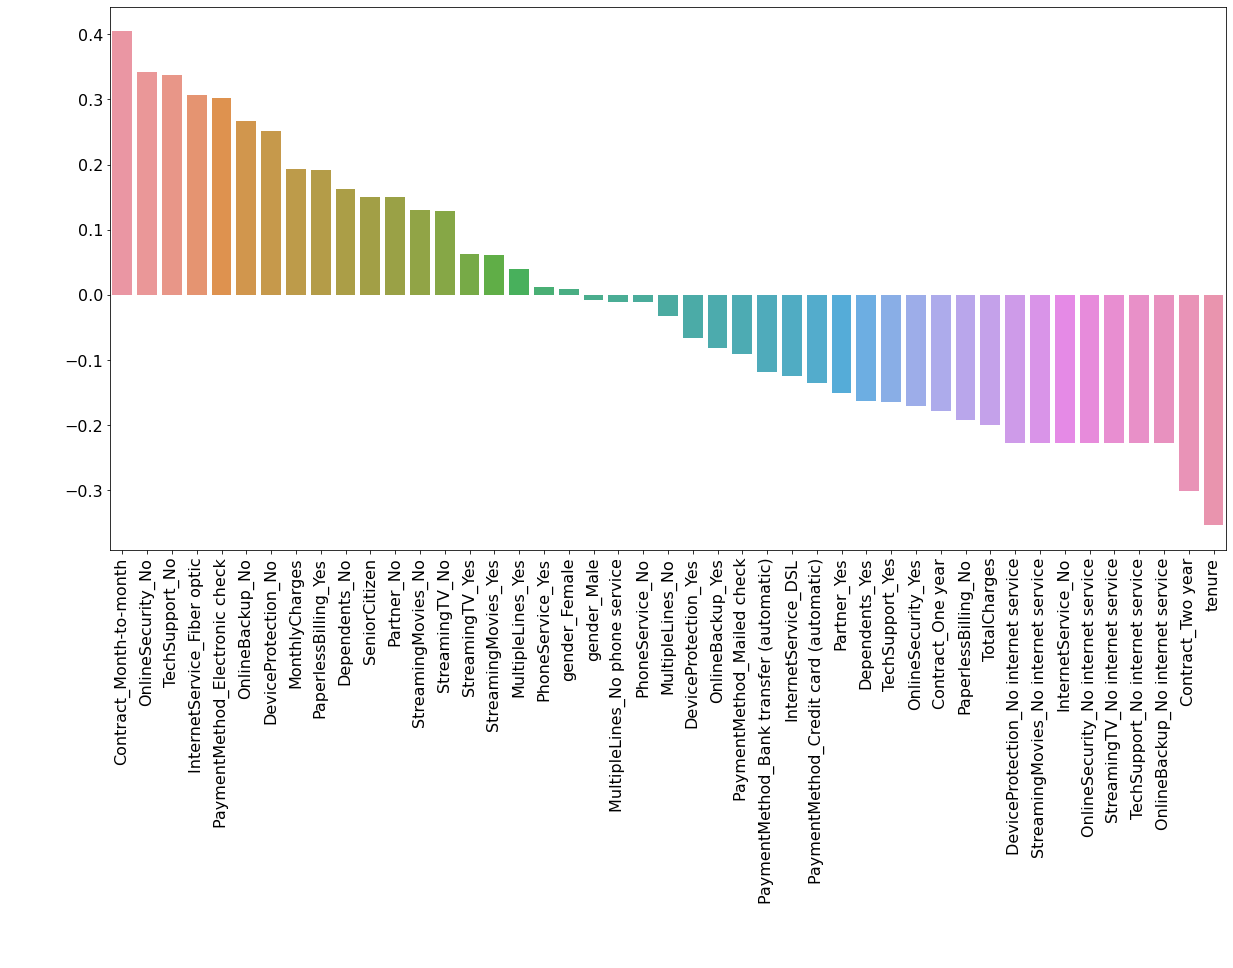

In [16]:
corr = dfd.corr()['Churn'].sort_values(ascending = False)
corr = corr.iloc[1:]
plt.figure(figsize=(20,10))
plt.xlabel('Columns',fontdict=font,labelpad=40)
plt.ylabel('Correlation with Churn',fontdict=font,labelpad=40)
plt.xticks(fontsize=16,rotation='vertical')
plt.yticks(fontsize=16)
sns.barplot(x=corr.index, y=corr)
plt.savefig(r"C:\Users\asus\Desktop\ITWorkshop\CustomerChurnPrediction\Chayanika\Confusion Matrices\Correlation.png")
plt.show()

Anything that has a correlation less than 0.1, should be dropped as it won't affect the output much.

Month to month contracts, absence of online security and tech support seem to be positively correlated with churn. While, tenure, two year contracts seem to be negatively correlated with churn.

Interestingly, services such as Online security, streaming TV, online backup, tech support, etc. without internet connection seem to be negatively related to churn.

We will explore the patterns for the above correlations below before we delve into modelling and identifying the important variables.

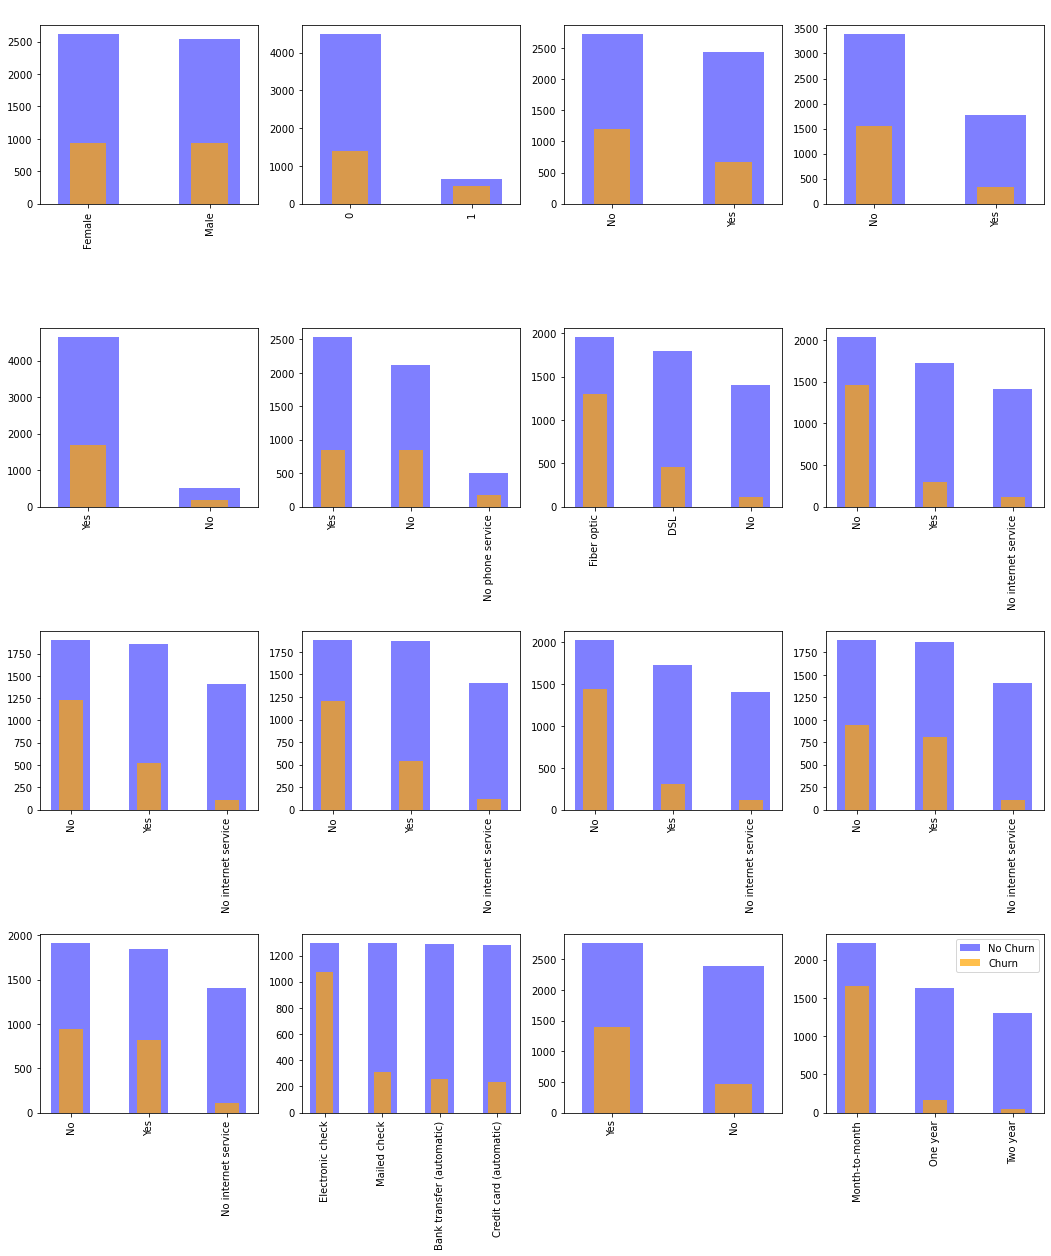

In [17]:
categorical_features = [ 'gender', 'SeniorCitizen', 'Partner',
 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaymentMethod',
 'PaperlessBilling', 'Contract' ]
ROWS, COLS = 4, 4
fig, ax = plt.subplots(ROWS, COLS, figsize=(18, 20) )
row, col = 0, 0
for i, categorical_feature in enumerate(categorical_features):
    if col == COLS - 1: 
        row += 1
    col = i % COLS
    df[df.Churn==0][categorical_feature].value_counts().plot(kind='bar', width=.5, ax=ax[row, col], color='blue', alpha=0.5).set_title(categorical_feature, fontdict=font)
    df[df.Churn==1][categorical_feature].value_counts().plot(kind='bar', width=.3, ax=ax[row, col], color='orange', alpha=0.7).set_title(categorical_feature, fontdict=font)
    plt.legend(['No Churn', 'Churn'])
    fig.subplots_adjust(hspace=0.7)

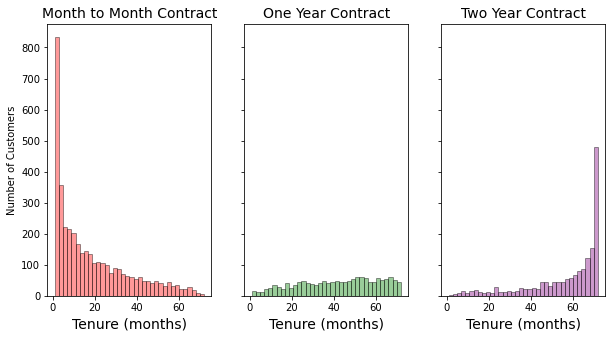

In [18]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey = True, figsize = (10,5))

ax = sns.distplot(df[df['Contract']=='Month-to-month']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'red',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax1)
ax.set_ylabel('Number of Customers')
ax.set_xlabel('Tenure (months)',size = 14)
ax.set_title('Month to Month Contract',size = 14)
# turquoise

ax = sns.distplot(df[df['Contract']=='One year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'green',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax2)
ax.set_xlabel('Tenure (months)',size = 14)
ax.set_title('One Year Contract',size = 14)
# pink

ax = sns.distplot(df[df['Contract']=='Two year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'purple',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax3)

ax.set_xlabel('Tenure (months)',size = 14)
ax.set_title('Two Year Contract',size = 14)
# yellow
plt.savefig(r"C:\Users\asus\Desktop\ITWorkshop\CustomerChurnPrediction\Chayanika\Confusion Matrices\Contract.png")

Customers with monthly contracts are more likely to leave the company while ones with Two Year contracts are less likely to do so. This might be because, the money paid might be non-refundable and hence the customers with longer contracts are bound to stay in the company.

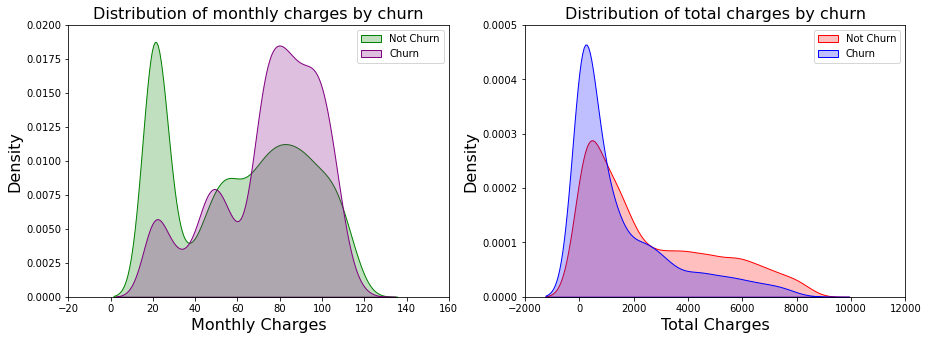

In [19]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize = (15,5))
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 0) ], ax=ax1,
                color="Green", shade = True)
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 1) ],
                ax =ax1, color="Purple", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density', size=16)
ax.set_xlabel('Monthly Charges', size=16)
ax.set_title('Distribution of monthly charges by churn', size=16)
ax.set_xticks(ticks = ax.get_xticks(),size=16)
ax.set_yticks(ticks = ax.get_yticks(),size=16)

ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 0) ], ax=ax2,
                color="Red", shade = True)
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 1) ],
                ax =ax2, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density',size=16)
ax.set_xlabel('Total Charges',size=16)
ax.set_title('Distribution of total charges by churn',size=16)
ax.set_xticks(ticks = ax.get_xticks(),size=16)
ax.set_yticks(ticks = ax.get_yticks(),size=16)

plt.savefig(r"C:\Users\asus\Desktop\ITWorkshop\CustomerChurnPrediction\Chayanika\Confusion Matrices\Charges.png")
plt.show()

In [20]:
y = dfd['Churn'].values
X = dfd.drop(columns = ['Churn'])

# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [22]:
def model_report(model_name, model, name):
    model.fit(X_train, y_train)
    optimal_th = 0.5
    
    for i in range(0,3):
        score_list = []
        th_list = [np.linspace(optimal_th-0.4999, optimal_th+0.4999, 11), 
                 np.linspace(optimal_th-0.1, optimal_th+0.1, 21), 
                 np.linspace(optimal_th-0.01, optimal_th+0.01, 21)]
        for th in th_list[i]:
            y_pred = (model.predict_proba(X_test)[:,1] >= th)
            f1scor = f1_score(y_test, y_pred,average='weighted')
            score_list.append(f1scor)
        optimal_th = float(th_list[i][score_list.index(np.max(score_list))])

    print('optimal F1 score = {:.4f}'.format(np.max(score_list)))
    print('optimal threshold = {:.3f}'.format(optimal_th))

    print(model_name, 'accuracy score is')
    atrain = 100*model.score(X_train, y_train)
    atest = 100*model.score(X_test, y_test)
    atr.append(atrain)
    ate.append(atest)
    print('Training: {:.2f}%'.format(atrain))  
    print('Test set: {:.2f}%'.format(atest))   

    y_pred = (model.predict_proba(X_test)[:,1] >= optimal_th)
    print('\nOptimal threshold {:.3f}'.format(optimal_th))
    print('Precision: {:.4f},   Recall: {:.4f},   F1 Score: {:.4f}'.format(
        precision_score(y_test, y_pred,average='weighted'), recall_score(y_test, y_pred,average='weighted'), f1_score(y_test, y_pred,average='weighted')))
    print(model_name, 'confusion matrix: \n')
    cf_matrix =  confusion_matrix(y_test, y_pred)
    categories  = ['No Churn','Churn']
    group_names = ['True Postive','False Negative', 'False Positive','True Negative']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    print()
    print('Confusion matrix')
    conf_m = sns.heatmap(cf_matrix, annot = labels, cmap = 'PiYG',fmt = '',
                xticklabels = categories, yticklabels = categories)
    
    plt.savefig(r"C:\Users\asus\Desktop\ITWorkshop\CustomerChurnPrediction\Chayanika\Confusion Matrices 2\{}".format(name))
    plt.show()
    global model_f1, model_auc, model_ll, model_roc_auc
    model_f1 = f1_score(y_test, y_pred,average='weighted')

    y_pred = model.predict_proba(X_test)
    model_ll = log_loss(y_test, y_pred)
    print(model_name, 'Log-loss: {:.4f}'.format(model_ll))
    y_pred = model.predict(X_test)
    model_roc_auc = roc_auc_score(y_test, y_pred)
    print(model_name, 'roc_auc_score: {:.4f}'.format(model_roc_auc)) 
    y_pred = model.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    model_auc = auc(fpr, tpr)
    print(model_name, 'AUC: {:.4f}'.format(model_auc))

    # plot the ROC curve
    plt.figure(figsize = [6,6])
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % model_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    # plt.savefig('roc_auc_score')
    plt.show()
  
    return

# initialise lists to collect the results to plot later
model_list = []
f1_list = []
auc_list = []
ll_list = []
roc_auc_list = []
time_list = []
atr = []
ate = []

# Cross Validation and Prediction

# Logistic Regression

optimal F1 score = 0.8044
optimal threshold = 0.523
LogisticRegression accuracy score is
Training: 80.09%
Test set: 80.85%

Optimal threshold 0.523
Precision: 0.8020,   Recall: 0.8118,   F1 Score: 0.8044
LogisticRegression confusion matrix: 


Confusion matrix


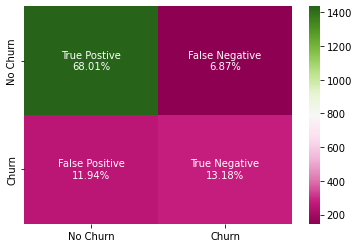

LogisticRegression Log-loss: 0.4183
LogisticRegression roc_auc_score: 0.7211
LogisticRegression AUC: 0.8356


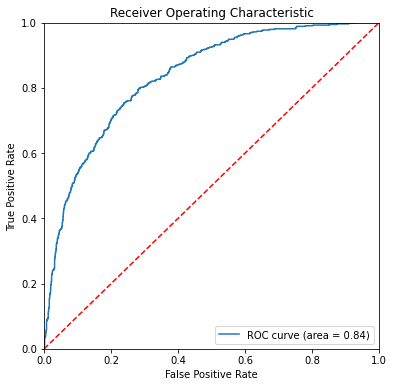

In [23]:
kf = KFold(n_splits=10, random_state=21, shuffle=True)  
score_list = []
c_list = 10**np.linspace(-3,3,200)
for c in c_list:
    logit = LogisticRegression(C = c)
    cvs = (cross_val_score(logit, X_train, y_train, cv=kf, scoring='f1')).mean()
    score_list.append(cvs)
optimal_c = float(c_list[score_list.index(np.max(score_list))])

time1 = time.time()
logit = LogisticRegression(C = optimal_c)
model_report('LogisticRegression', logit, 'LR.png')

model_list.append('LogisticRegression')
f1_list.append(model_f1)
auc_list.append(model_auc)
ll_list.append(model_ll)
roc_auc_list.append(model_roc_auc)
time_list.append(time.time() - time1)

# K Nearest Neighbors

optimal cv F1 score = 0.5965
optimal value of K = 19
optimal F1 score = 0.7767
optimal threshold = 0.474
KNN accuracy score is
Training: 80.41%
Test set: 77.73%

Optimal threshold 0.474
Precision: 0.7761,   Recall: 0.7773,   F1 Score: 0.7767
KNN confusion matrix: 


Confusion matrix


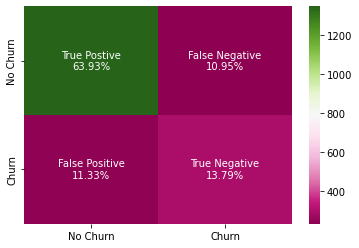

KNN Log-loss: 0.5607
KNN roc_auc_score: 0.7014
KNN AUC: 0.8119


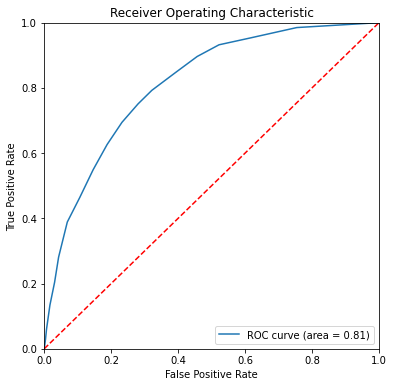

In [24]:
kf = KFold(n_splits=10, random_state=21, shuffle=True)  
k_scores = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors = k)
    cvs = cross_val_score(knn, X_train, y_train, cv=kf, scoring='f1').mean()
    k_scores.append(cvs)
print('optimal cv F1 score = {:.4f}'.format(np.max(k_scores))) 
optimal_k = k_scores.index(np.max(k_scores))+1 
print('optimal value of K =', optimal_k)

time1 = time.time()
knn = KNeighborsClassifier(n_neighbors = optimal_k)
model_report('KNN', knn, 'KNN.png')

model_list.append('KNN')
f1_list.append(model_f1)
auc_list.append(model_auc)
ll_list.append(model_ll)
roc_auc_list.append(model_roc_auc)
time_list.append(time.time() - time1)

# Bernoulli Naive Bayes

optimal F1 score = 0.7953
optimal threshold = 0.994
BernoulliNB accuracy score is
Training: 72.57%
Test set: 71.18%

Optimal threshold 0.994
Precision: 0.7923,   Recall: 0.8019,   F1 Score: 0.7953
BernoulliNB confusion matrix: 


Confusion matrix


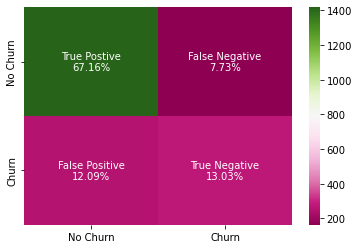

BernoulliNB Log-loss: 1.4317
BernoulliNB roc_auc_score: 0.7324
BernoulliNB AUC: 0.8048


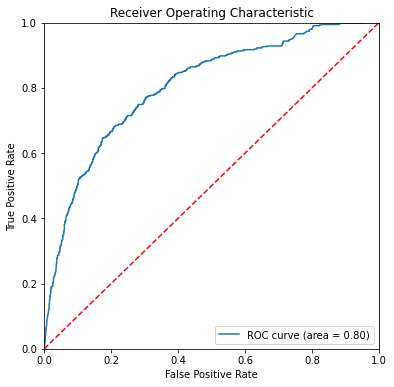

In [25]:
# Bernoulli Naive Bayes
time1 = time.time()
bnb = BernoulliNB()
model_report('BernoulliNB', bnb, "NB.png")

model_list.append('BernoulliNB')
f1_list.append(model_f1)
auc_list.append(model_auc)
ll_list.append(model_ll)
roc_auc_list.append(model_roc_auc)
time_list.append(time.time() - time1)

# Decision Tree

optimal F1 score = 0.5942
optimal max_depth = 2
optimal F1 score = 0.7618
optimal threshold = 0.287
DecisionTreeClassifier accuracy score is
Training: 76.43%
Test set: 75.69%

Optimal threshold 0.287
Precision: 0.7686,   Recall: 0.7569,   F1 Score: 0.7618
DecisionTreeClassifier confusion matrix: 


Confusion matrix


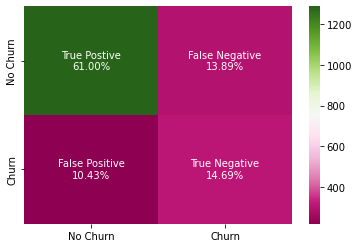

DecisionTreeClassifier Log-loss: 0.4650
DecisionTreeClassifier roc_auc_score: 0.6997
DecisionTreeClassifier AUC: 0.7738


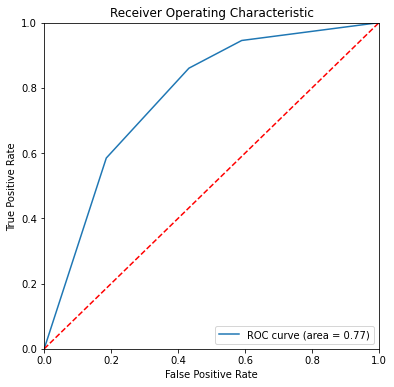

In [26]:
kf = KFold(n_splits=10, random_state=21, shuffle=True) 
d_scores = []
for d in range(2, 11):
    decisiontree = DecisionTreeClassifier(max_depth=d)
    cvs = cross_val_score(decisiontree, X_train, y_train, cv=kf, scoring='f1').mean()
    d_scores.append(cvs)
print('optimal F1 score = {:.4f}'.format(np.max(d_scores)))
optimal_d = d_scores.index(np.max(d_scores))+2  
print('optimal max_depth =', optimal_d)

time1 = time.time()
decisiontree = DecisionTreeClassifier(max_depth=optimal_d)
model_report('DecisionTreeClassifier', decisiontree, 'DT.png')

model_list.append('DecisionTreeClassifier')
f1_list.append(model_f1)
auc_list.append(model_auc)
ll_list.append(model_ll)
roc_auc_list.append(model_roc_auc)
time_list.append(time.time() - time1)

# Random Forest

optimal n_estimators = 250
optimal F1 score = 0.7916
optimal threshold = 0.525
RandomForestClassifier accuracy score is
Training: 99.82%
Test set: 79.62%

Optimal threshold 0.525
Precision: 0.7891,   Recall: 0.8014,   F1 Score: 0.7916
RandomForestClassifier confusion matrix: 


Confusion matrix


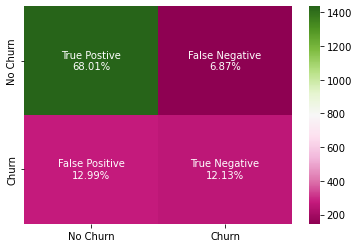

RandomForestClassifier Log-loss: 0.4784
RandomForestClassifier roc_auc_score: 0.6984
RandomForestClassifier AUC: 0.8177


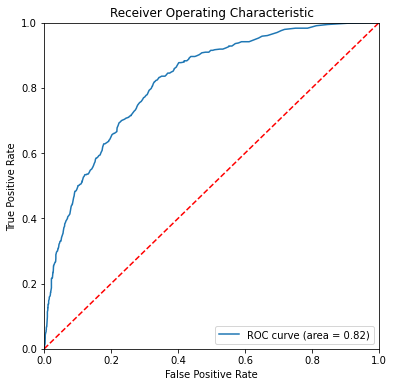

In [27]:
kf = KFold(n_splits=10, random_state=21, shuffle=True)
score_list = []
n_list = []
for n in [100, 150, 200, 250, 300, 350, 400, 450, 500]:
    randomforest = RandomForestClassifier(n_estimators=n)
    cvs = (cross_val_score(randomforest, X_train, y_train, cv=kf, scoring='f1')).mean()
    score_list.append(cvs)
    n_list.append(n)
optimal_n = int(n_list[score_list.index(np.max(score_list))])
print('optimal n_estimators = {:.0f}'.format(optimal_n))

time1 = time.time()
randomforest = RandomForestClassifier(n_estimators=optimal_n)
model_report('RandomForestClassifier', randomforest, 'RF.png')

model_list.append('RandomForestClassifier')
f1_list.append(model_f1)
auc_list.append(model_auc)
ll_list.append(model_ll)
roc_auc_list.append(model_roc_auc)
time_list.append(time.time() - time1)

# Linear Support Vector Classifier

LinearSVC accuracy score is
Training: 79.93%
Test set: 80.66%
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1580
           1       0.64      0.53      0.58       530

    accuracy                           0.81      2110
   macro avg       0.74      0.71      0.73      2110
weighted avg       0.80      0.81      0.80      2110

LinearSVC confusion matrix: 


Confusion matrix


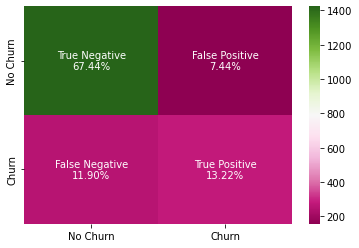

LinearSVC Log-loss: 6.6786
LinearSVC roc_auc_score: 0.7135
LinearSVC AUC: 0.7135


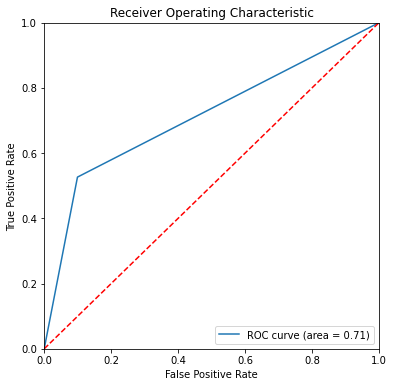

In [28]:
time1 = time.time()
linearsvc = LinearSVC()
linearsvc.fit(X_train, y_train)
print('LinearSVC accuracy score is')
atrain = 100*linearsvc.score(X_train, y_train)
atest = 100*linearsvc.score(X_test, y_test)
atr.append(atrain)
ate.append(atest)
print('Training: {:.2f}%'.format(atrain))  
print('Test set: {:.2f}%'.format(atest))

y_pred = linearsvc.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print('LinearSVC confusion matrix: \n')
cf_matrix = confusion_matrix(y_test, y_pred)
categories  = ['No Churn','Churn']
group_names = ['True Negative','False Positive', 'False Negative','True Positive']
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
print()
print('Confusion matrix')
conf_m = sns.heatmap(cf_matrix, annot = labels, cmap = 'PiYG',fmt = '',
            xticklabels = categories, yticklabels = categories)

plt.savefig(r"C:\Users\asus\Desktop\ITWorkshop\CustomerChurnPrediction\Chayanika\Confusion Matrices 2\LSVC.png")
plt.show()

model_f1 = f1_score(y_test, y_pred, average='weighted')

model_ll = log_loss(y_test, y_pred)
print('LinearSVC Log-loss: {:.4f}'.format(model_ll))
model_roc_auc = roc_auc_score(y_test, y_pred)
print('LinearSVC roc_auc_score: {:.4f}'.format(model_roc_auc)) 
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
model_auc = auc(fpr, tpr)
print('LinearSVC AUC: {:.4f}'.format(model_auc))

plt.figure(figsize = [6,6])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % model_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

model_list.append('LinearSVC')
f1_list.append(model_f1)
auc_list.append(model_auc)
ll_list.append(model_ll)
roc_auc_list.append(model_roc_auc)
time_list.append(time.time() - time1)

# Support Vector Classifier

optimal F1 score = 0.8005
optimal threshold = 0.422
SVC accuracy score is
Training: 81.90%
Test set: 80.62%

Optimal threshold 0.422
Precision: 0.7981,   Recall: 0.8085,   F1 Score: 0.8005
SVC confusion matrix: 


Confusion matrix


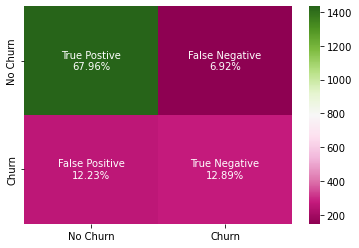

SVC Log-loss: 0.4482
SVC roc_auc_score: 0.7044
SVC AUC: 0.8001


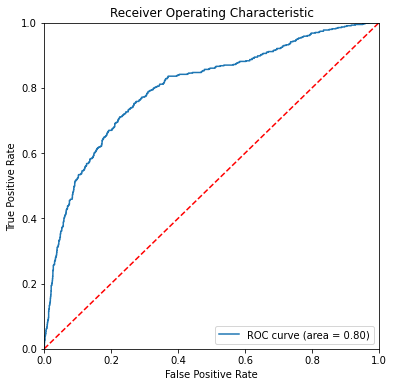

In [29]:
time1 = time.time()
svc = SVC(gamma='scale', probability=True)
model_report('SVC', svc, 'SVC.png')

model_list.append('SVC')
f1_list.append(model_f1)
auc_list.append(model_auc)
ll_list.append(model_ll)
roc_auc_list.append(model_roc_auc)
time_list.append(time.time()-time1) 

In [30]:
# Adaboost Algorith

optimal F1 score = 0.8053
optimal threshold = 0.500
Adaptive Boosting accuracy score is
Training: 81.08%
Test set: 81.04%

Optimal threshold 0.500
Precision: 0.8028,   Recall: 0.8104,   F1 Score: 0.8053
Adaptive Boosting confusion matrix: 


Confusion matrix


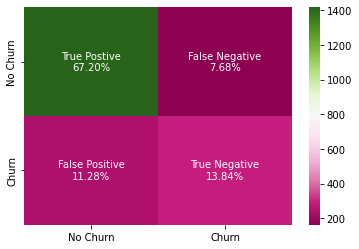

Adaptive Boosting Log-loss: 0.6749
Adaptive Boosting roc_auc_score: 0.7242
Adaptive Boosting AUC: 0.8367


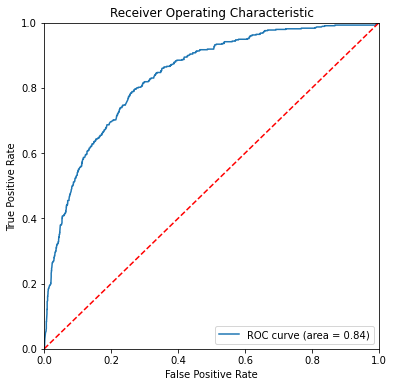

optimal F1 score = 0.7926
optimal threshold = 0.488
XG Boosting accuracy score is
Training: 95.35%
Test set: 79.72%

Optimal threshold 0.488
Precision: 0.7897,   Recall: 0.7976,   F1 Score: 0.7926
XG Boosting confusion matrix: 


Confusion matrix


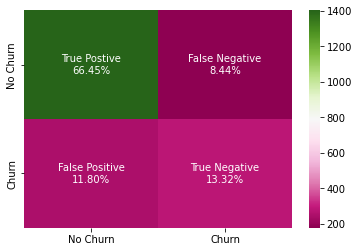

XG Boosting Log-loss: 0.4640
XG Boosting roc_auc_score: 0.7041
XG Boosting AUC: 0.8248


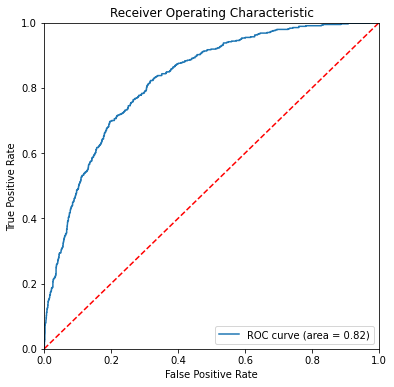

In [31]:
# AdaBoost Algorithm
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
model_report('Adaptive Boosting', ada, 'ADA.png')
model_list.append('AdaBoost')
f1_list.append(model_f1)
auc_list.append(model_auc)
ll_list.append(model_ll)
roc_auc_list.append(model_roc_auc)
time_list.append(time.time()-time1)

from xgboost import XGBClassifier
xgb = XGBClassifier()
model_report('XG Boosting', xgb, 'XGB.png')
model_list.append('XGBoost')
f1_list.append(model_f1)
auc_list.append(model_auc)
ll_list.append(model_ll)
roc_auc_list.append(model_roc_auc)
time_list.append(time.time()-time1) 

In [33]:
def evaluating(model,X_test,y_test,name):
    y_pred = model.predict(X_test)
    atrain = 100*model.score(X_train, y_train)
    atest = 100*model.score(X_test, y_test)
    print('Training: {:.2f}%'.format(atrain))  
    print('Test set: {:.2f}%'.format(atest))
    auc = roc_auc_score(y_test, y_pred)
    print()
    print('Classification Report:')
    cr = classification_report(y_test, y_pred)
    print(cr)
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories  = ['No Churn','Churn']
    group_names = ['True Postive','False Negative', 'False Positive','True Negative']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)] #converting confusion matrix value to percentage in 2 decimal places.

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    print()
    print('Confusion matrix')
    conf_m = sns.heatmap(cf_matrix, annot = labels, cmap = 'PiYG',fmt = '',
                xticklabels = categories, yticklabels = categories)
    
    plt.savefig(r"C:\Users\asus\Desktop\ITWorkshop\CustomerChurnPrediction\Chayanika\Confusion Matrices\{}".format(name))
    plt.show()
    fpr, tpr, _ = roc_curve(y_test,  y_pred)
    print()
    print('ROC Curve:')
    #create ROC curve
    auc_curve = plt.plot(fpr,tpr,label="AUC="+str(auc))
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend(loc=4)
    plt.show()
    return atest

# Stochastic Gradient Descent

Training: 74.73%
Test set: 74.74%

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.77      0.82      1580
           1       0.50      0.69      0.58       530

    accuracy                           0.75      2110
   macro avg       0.69      0.73      0.70      2110
weighted avg       0.78      0.75      0.76      2110


Confusion matrix


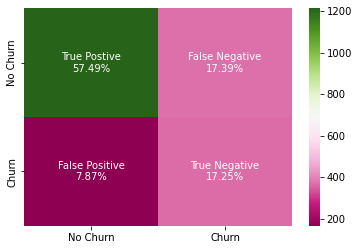


ROC Curve:


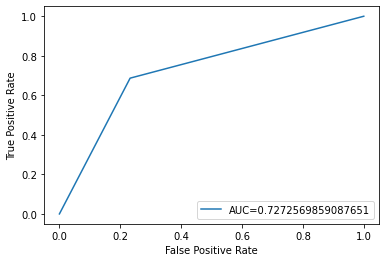

In [34]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss="modified_huber")
sgd.fit(X = X_train, y = y_train)
a = evaluating(sgd,X_test,y_test,"SGD.png")
ate.append(a)

In [35]:
acc_dict = {'model':['Logistic Regression','KNN','BernoulliNB','Decision Tree','Random Forest','Linear SVC','SVC','AdaBoost','XGBoost','SGD'],'accuracy': ate}

optimal F1 score = 0.7883
optimal threshold = 0.564
SGD accuracy score is
Training: 77.35%
Test set: 77.16%

Optimal threshold 0.564
Precision: 0.7886,   Recall: 0.7882,   F1 Score: 0.7883
SGD confusion matrix: 


Confusion matrix


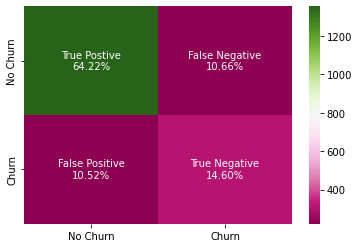

SGD Log-loss: 0.9283
SGD roc_auc_score: 0.7290
SGD AUC: 0.8173


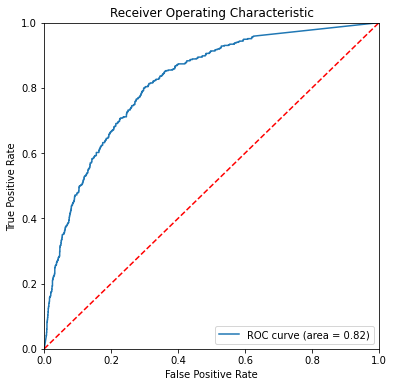

In [36]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss="modified_huber")
sgd.fit(X = X_train, y = y_train)
# a = evaluating(sgd,X_test,y_test,"SGD.png")
# ate.append(a)
model_report('SGD', sgd, 'SGD_B.png')
model_list.append('SGD')
f1_list.append(model_f1)
auc_list.append(model_auc)
ll_list.append(model_ll)
roc_auc_list.append(model_roc_auc)
time_list.append(time.time()-time1) 

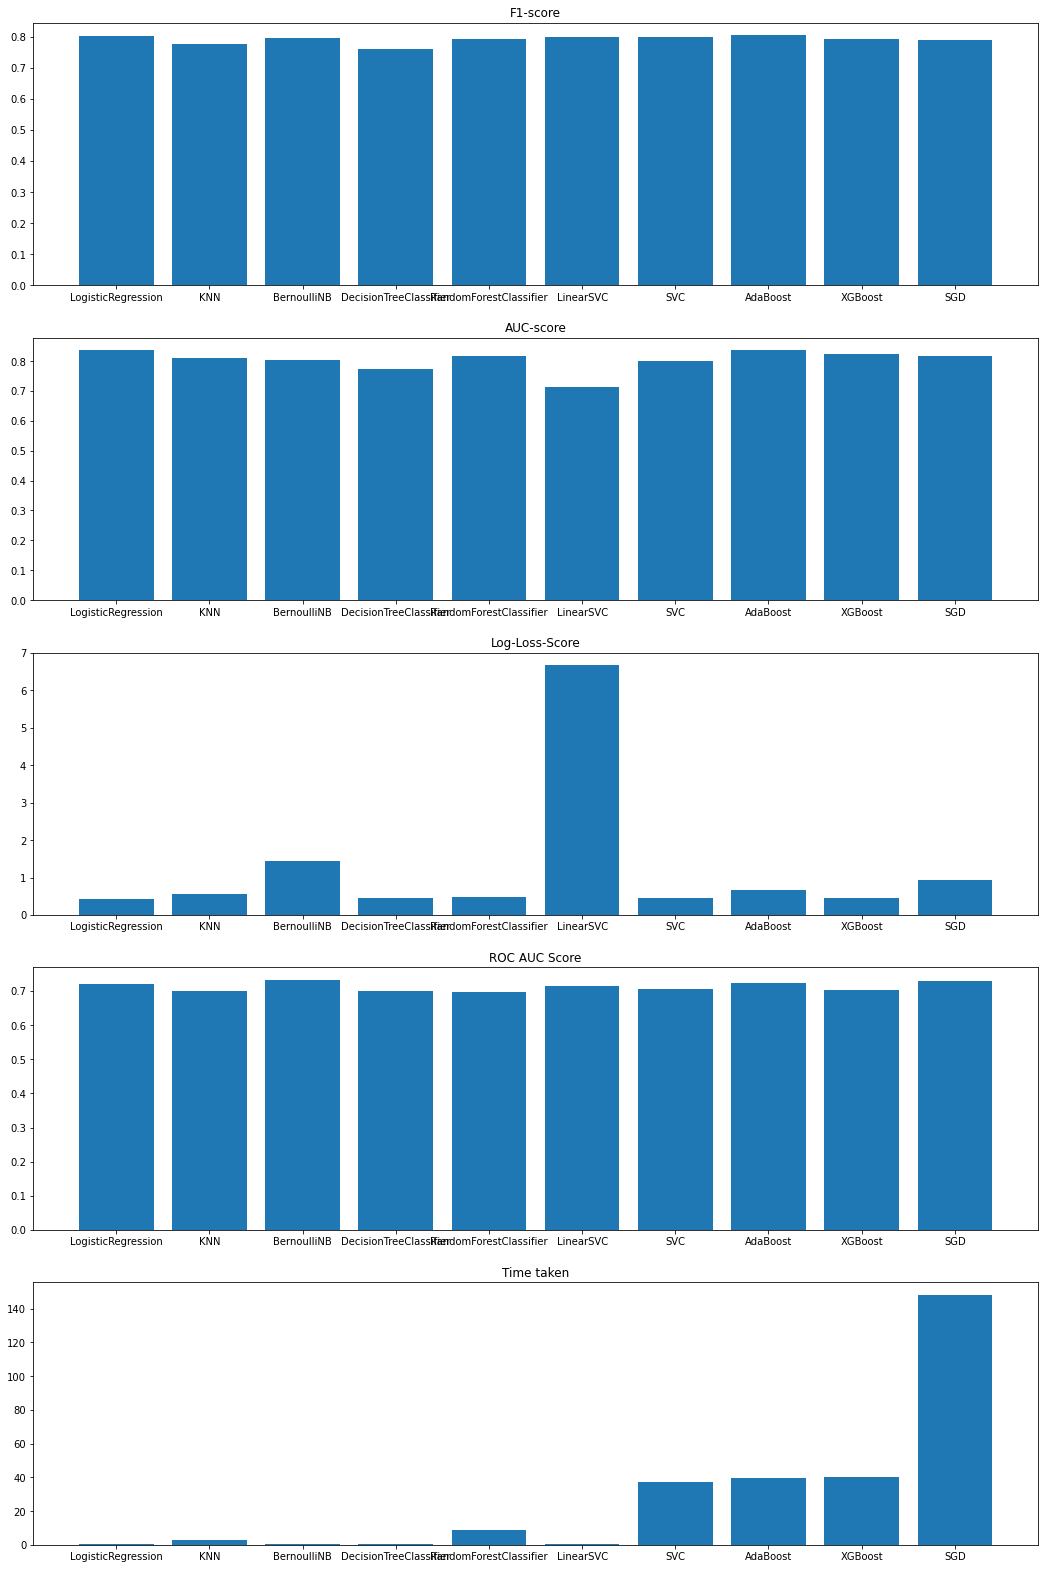

In [37]:
fig, ax = plt.subplots(5, 1, figsize=(18, 28))
ax[0].bar(model_list, f1_list)
ax[0].set_title('F1-score')
ax[1].bar(model_list, auc_list)
ax[1].set_title('AUC-score')
ax[2].bar(model_list, ll_list)
ax[2].set_title('Log-Loss-Score')
ax[3].bar(model_list, roc_auc_list)
ax[3].set_title('ROC AUC Score')
ax[4].bar(model_list, time_list)
ax[4].set_title('Time taken')
fig.subplots_adjust(hspace=0.2, wspace=0.2)

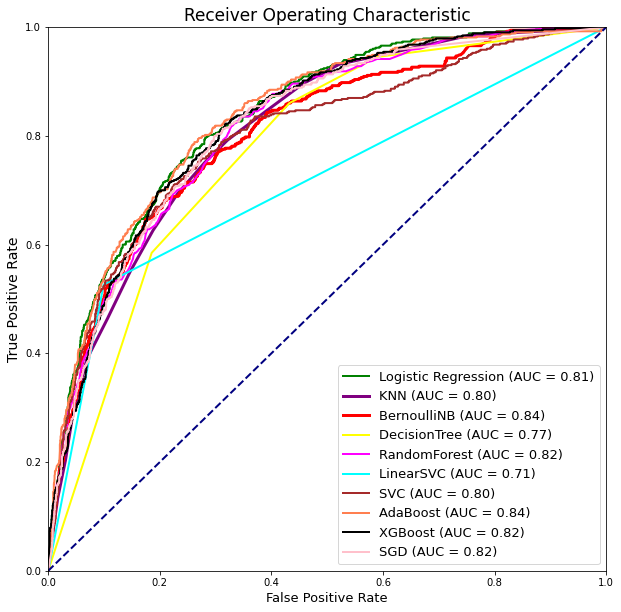

In [38]:
# plot the ROC curves
plt.figure(figsize=(10,10))

y_pred = logit.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, color='green',
        lw=2, label='Logistic Regression (AUC = %0.2f)' % auc_list[1])

y_pred = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, color='purple',
        lw=3, label='KNN (AUC = %0.2f)' % auc_list[2])

y_pred = bnb.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, color='red',
        lw=3, label='BernoulliNB (AUC = %0.2f)' % auc_list[0])

y_pred = decisiontree.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, color='yellow',
        lw=2, label='DecisionTree (AUC = %0.2f)' % auc_list[3])

y_pred = randomforest.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, color='magenta',
        lw=2, label='RandomForest (AUC = %0.2f)' % auc_list[4])

y_pred = linearsvc.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, color='cyan',
        lw=2, label='LinearSVC (AUC = %0.2f)' % auc_list[5])

y_pred = svc.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, color='brown',
        lw=2, label='SVC (AUC = %0.2f)' % auc_list[6])

y_pred = ada.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, color='coral',
        lw=2, label='AdaBoost (AUC = %0.2f)' % auc_list[7])

y_pred = xgb.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, color='black',
        lw=2, label='XGBoost (AUC = %0.2f)' % auc_list[8])

y_pred = sgd.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, color='pink',
        lw=2, label='SGD (AUC = %0.2f)' % auc_list[8])

rocAuc = plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic', fontsize=17)
plt.legend(loc='lower right', fontsize=13)
plt.savefig(r"C:\Users\asus\Desktop\ITWorkshop\CustomerChurnPrediction\Chayanika\Confusion Matrices\ROC_AUC.png")
plt.show()


In [39]:
acc_dict = {'model':['Logistic Regression','KNN','BernoulliNB','Decision Tree','Random Forest','Linear SVC','SVC','AdaBoost','XGBoost','SGD'],'accuracy': ate}

In [45]:
ate.pop(9)

77.1563981042654

In [46]:
acc_df = pd.DataFrame(acc_dict)

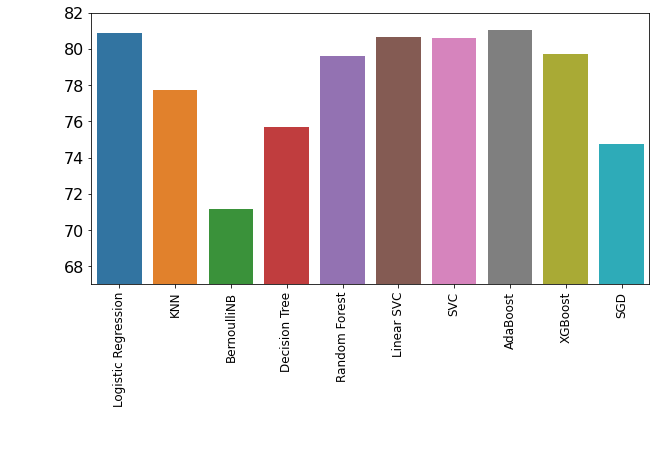

In [47]:
plt.figure(figsize=(10,5))
plt.xlabel('Model',fontdict=font,labelpad=40)
plt.ylabel('Accuracy',fontdict=font,labelpad=40)
plt.xticks(fontsize=12, rotation='vertical')
plt.yticks(fontsize=16)
plt.ylim([67,82])
sns.barplot(x=acc_df['model'], y=acc_df['accuracy'])
plt.show()

In [48]:
acc = []

# Evaluation

In [49]:
def evaluating(model,X_test,y_test,name):
    y_pred = model.predict(X_test)
    atrain = 100*model.score(X_train, y_train)
    atest = 100*model.score(X_test, y_test)
    print('Training: {:.2f}%'.format(atrain))  
    print('Test set: {:.2f}%'.format(atest))
    auc = roc_auc_score(y_test, y_pred)
    print()
    print('Classification Report:')
    cr = classification_report(y_test, y_pred)
    print(cr)
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories  = ['No Churn','Churn']
    group_names = ['True Postive','False Negative', 'False Positive','True Negative']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)] #converting confusion matrix value to percentage in 2 decimal places.

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    print()
    print('Confusion matrix')
    conf_m = sns.heatmap(cf_matrix, annot = labels, cmap = 'PiYG',fmt = '',
                xticklabels = categories, yticklabels = categories)
    
    plt.savefig(r"C:\Users\asus\Desktop\ITWorkshop\CustomerChurnPrediction\Chayanika\Confusion Matrices\{}".format(name))
    plt.show()
    fpr, tpr, _ = roc_curve(y_test,  y_pred)
    print()
    print('ROC Curve:')
    #create ROC curve
    auc_curve = plt.plot(fpr,tpr,label="AUC="+str(auc))
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend(loc=4)
    plt.show()
    return atest

# Hyperparameter Tuning

# Logistic Regression

In [50]:
logModel= LogisticRegression()
param_grid ={
    'penalty' : ['l1','l2','elasticent','none'],
    'C' : np.logspace(-4,-4,20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter':[100,1000,2500,5000]
    }

In [51]:
# grid = GridSearchCV(logModel,param_grid=param_grid,cv=10,n_jobs=-1)
# best_model=grid.fit(X_train,y_train)

In [52]:
# print('Best C:', best_model.best_estimator_.get_params()['C'])
# print('Best solver:', best_model.best_estimator_.get_params()['solver'])
# print('Best max_iter:', best_model.best_estimator_.get_params()['max_iter'])
# print('Best penalty:', best_model.best_estimator_.get_params()['penalty'])

Training: 80.23%
Test set: 80.76%

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1580
           1       0.64      0.54      0.58       530

    accuracy                           0.81      2110
   macro avg       0.75      0.72      0.73      2110
weighted avg       0.80      0.81      0.80      2110


Confusion matrix


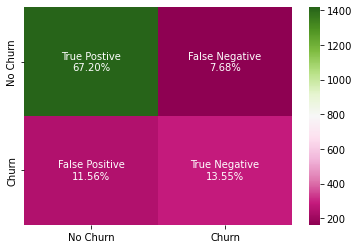


ROC Curve:


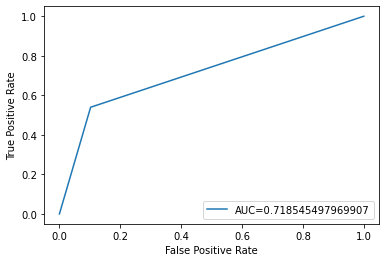

In [53]:
logit = LogisticRegression()
logit = logit.fit(X_train, y_train)
a = evaluating(logit,X_test,y_test,"LR.png")
acc.append(a)

# K Nearest Neighbours

In [54]:
#List Hyperparameters that we want to tune.
# import time
# t1 = time.time()
# leaf_size = list(range(1,50))
# n_neighbors = list(range(1,30))
# p=[1,2]
# #Convert to dictionary
# hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
# #Create new KNN object
# knn_2 = KNeighborsClassifier()
# #Use GridSearch
# print('quick till here')
# clf = GridSearchCV(knn_2, hyperparameters, cv=10, n_jobs=2)
# t2 = time.time()
# #Fit the model
# best_model = clf.fit(X_train,y_train)
# #Print The value of best Hyperparameters
# print('Time taken:',t2-t1)
# print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
# print('Best p:', best_model.best_estimator_.get_params()['p'])
# print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Training: 80.09%
Test set: 79.10%

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1580
           1       0.59      0.53      0.56       530

    accuracy                           0.79      2110
   macro avg       0.72      0.70      0.71      2110
weighted avg       0.78      0.79      0.79      2110


Confusion matrix


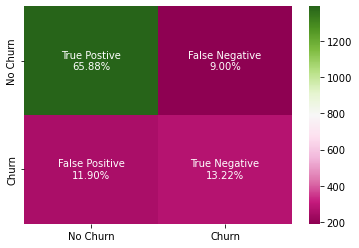


ROC Curve:


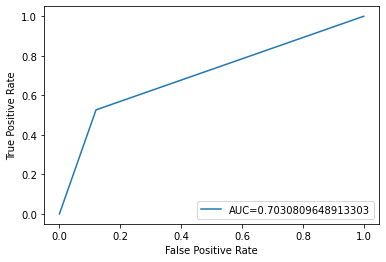

In [55]:
# Running KNN model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(metric='manhattan', n_neighbors=26, leaf_size=1)
knn  = knn .fit(X_train, y_train)
a  = evaluating(knn ,X_test,y_test,"KNN.png")
acc.append(a)

# Naive Bayes

In [56]:
acc.append(71.18)

# Decision Tree

In [58]:
para_dist={
    "criterion":["gini","entropy",'log_loss'],
    "max_depth":[1,2,3,4,5,6,7,None]
}
grid=GridSearchCV(decisiontree,param_grid=para_dist,cv=10,n_jobs=-1)
best_model = grid.fit(X_train,y_train)
print('Best criterion:', best_model.best_estimator_.get_params()['criterion'])
print('Best max_depth:', best_model.best_estimator_.get_params()['max_depth'])

Best criterion: gini
Best max_depth: 5


Training: 79.66%
Test set: 78.48%

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.85      0.86      1580
           1       0.57      0.60      0.58       530

    accuracy                           0.78      2110
   macro avg       0.72      0.72      0.72      2110
weighted avg       0.79      0.78      0.79      2110


Confusion matrix


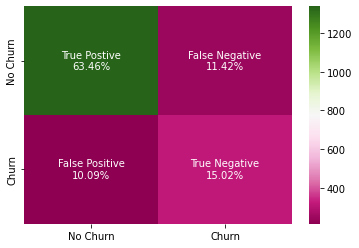


ROC Curve:


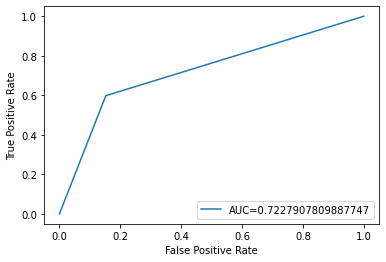

In [59]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion="gini", max_depth=5)
dt = dt.fit(X_train, y_train)
a = evaluating(dt,X_test,y_test,"DT.png")
acc.append(a)

# Random Forest

In [60]:
# param_grid = {
#     'bootstrap': [True],
#     'max_depth': [40,50,60,70],
#     'max_features': [2,3,4,5,6,7],
#     'min_samples_leaf': [3, 4.5],
#     'min_samples_split': [11, 12,13],
#     'n_estimators': [200,300,400,500]
# }
# rf = RandomForestRegressor()
# grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,cv = 10, n_jobs = -1, verbose = 2)
# grid_search.fit(X_train,y_train)
# print('Best bootstrap:', best_model.best_estimator_.get_params()['bootstrap'])
# print('Best max_depth:', best_model.best_estimator_.get_params()['max_depth'])
# print('Best max_features:', best_model.best_estimator_.get_params()['max_features'])
# print('Best min_samples_leaf:', best_model.best_estimator_.get_params()['min_samples_leaf'])
# print('Best min_samples_split:', best_model.best_estimator_.get_params()['min_samples_split'])
# print('Best n_estimators:', best_model.best_estimator_.get_params()['n_estimators'])

Training: 86.75%
Test set: 81.18%

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.92      0.88      1580
           1       0.67      0.50      0.57       530

    accuracy                           0.81      2110
   macro avg       0.76      0.71      0.73      2110
weighted avg       0.80      0.81      0.80      2110


Confusion matrix


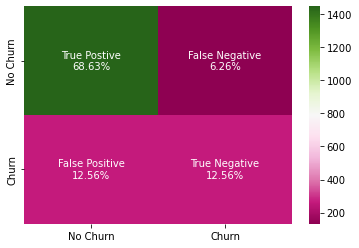


ROC Curve:


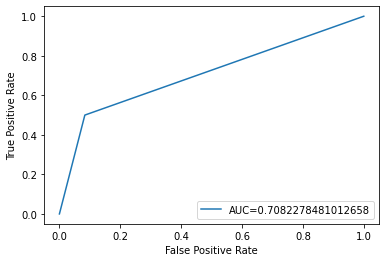

In [61]:
model = RandomForestClassifier(max_depth=40, max_features=6, min_samples_leaf=3,min_samples_split=13, n_estimators=400)
result = model.fit(X_train, y_train)
a = evaluating(model,X_test,y_test,"RF_H.png")
acc.append(a)

# SVC, LinearSVC

In [62]:
acc.append(80.66)

In [63]:
# param_grid = {'C': [0.1, 1, 10, 100, 1000],
#               'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
#               'kernel': ['rbf']}
 
# grid = GridSearchCV(model, param_grid, cv=10)
 
# best_model = grid.fit(X_train,y_train)
# print('Best C:', best_model.best_estimator_.get_params()['C'])
# print('Best gamma:', best_model.best_estimator_.get_params()['gamma'])
# print('Best kernel:', best_model.best_estimator_.get_params()['kernel'])

Training: 80.48%
Test set: 81.14%

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1580
           1       0.66      0.52      0.58       530

    accuracy                           0.81      2110
   macro avg       0.75      0.71      0.73      2110
weighted avg       0.80      0.81      0.80      2110


Confusion matrix


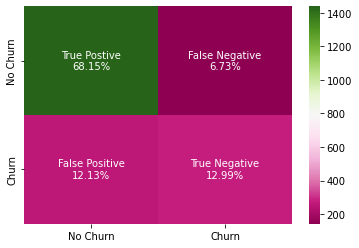


ROC Curve:


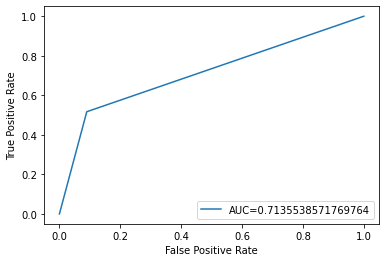

In [64]:
svc = SVC(C=10, gamma=0.01, kernel="rbf")
svc = svc.fit(X_train, y_train)
a = evaluating(svc,X_test,y_test,name="SVC.png")
acc.append(a)

# Adaptive Boosting

In [65]:
acc.append(81.04)
acc.append(79.72)
acc.append(79)

In [66]:
acc_dict = {'model':['Logistic Regression','KNN','BernoulliNB','Decision Tree','Random Forest','Linear SVC','SVC','AdaBoost','XGBoost','SGD'],'accuracy': acc}

In [67]:
acc

[80.75829383886256,
 79.0995260663507,
 71.18,
 78.48341232227489,
 81.18483412322274,
 80.66,
 81.13744075829385,
 81.04,
 79.72,
 79]

In [68]:
acc_df = pd.DataFrame(acc_dict)

In [69]:
acc_df

,model,accuracy
0,Logistic Regression,80.758294
1,KNN,79.099526
2,BernoulliNB,71.180000
3,Decision Tree,78.483412
4,Random Forest,81.184834
5,Linear SVC,80.660000
6,SVC,81.137441
7,AdaBoost,81.040000
8,XGBoost,79.720000
9,SGD,79.000000


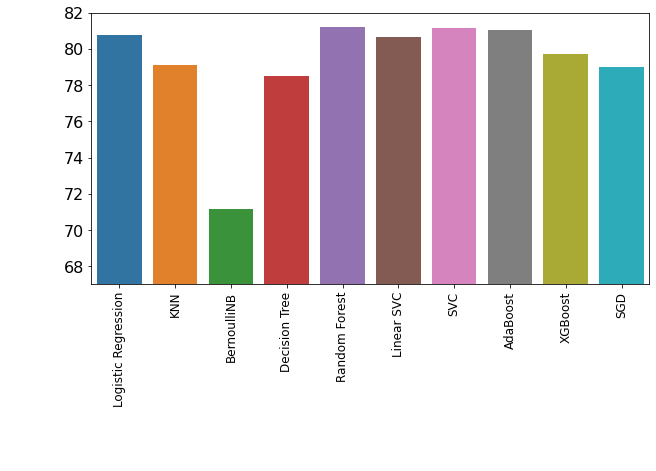

In [70]:
plt.figure(figsize=(10,5))
plt.xlabel('Model',fontdict=font,labelpad=40)
plt.ylabel('Accuracy',fontdict=font,labelpad=40)
plt.xticks(fontsize=12, rotation='vertical')
plt.yticks(fontsize=16)
plt.ylim([67,82])
sns.barplot(x=acc_df['model'], y=acc_df['accuracy'])
plt.show()

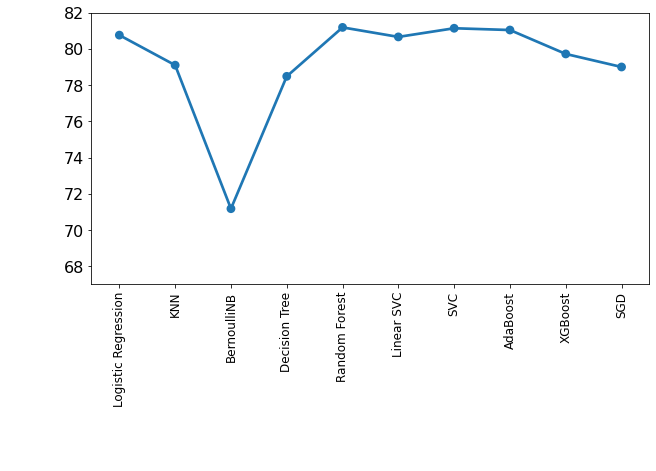

In [71]:
plt.figure(figsize=(10,5))
plt.xlabel('Model',fontdict=font,labelpad=40)
plt.ylabel('Accuracy',fontdict=font,labelpad=40)
plt.xticks(fontsize=12, rotation='vertical')
plt.yticks(fontsize=16)
plt.ylim([67,82])
sns.pointplot(x=acc_df['model'], y=acc_df['accuracy'])
plt.show()

# Making Predictions

In [72]:
def predict(model, to_pred):
    preds = model.predict(to_pred)
    preds = pd.DataFrame({'Churn': preds}) 
    preds = preds.replace([0,1], ["No","Yes"])   
    df = pd.concat([to_pred,preds], axis=1)
    return df

In [73]:
to_pred = dfd.sample(n=3, random_state=10, ignore_index=True)

In [74]:
to_pred

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,31,20.45,638.55,0,0,1,1,0,1,...,0,0,0,1,1,0,0,0,0,1
1,0,72,25.00,1849.20,0,1,0,0,1,1,...,0,0,0,1,1,0,0,1,0,0
2,0,14,59.10,772.85,0,1,0,1,0,1,...,1,0,1,0,1,0,0,1,0,0


In [75]:
to_pred = to_pred.drop(columns=['Churn'])

In [76]:
AdaModel = AdaBoostClassifier()
AdaModel.fit(X_train,y_train)
predict(AdaModel,to_pred)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,0,31,20.45,638.55,0,1,1,0,1,0,...,0,0,1,1,0,0,0,0,1,No
1,0,72,25.00,1849.20,1,0,0,1,1,0,...,0,0,1,1,0,0,1,0,0,No
2,0,14,59.10,772.85,1,0,1,0,1,0,...,0,1,0,1,0,0,1,0,0,No
